
# Multivariate EDA Rice Price

As we have previously explained, there is two models that are applied in order to accept the hypothesis or fail to accept the hypothesis. This is either being able to accept that the price of rice can be predicted using external factors such as the weather, other substiture good stock price suh as wheat or grain. Or fail to predict this.

We apply a univariate model that predicts the future daily change of rice price solely by looking at its previous time points, this is the basis of the model, this gives us a basis which will give us our abilityu to predict the daily change price of rice. 

We apply a multivariate model that predicts

If the multivariate model is significantly better than the univariate model then it shows that our hypothesis is correct


In order to apply the multivariate model we need to apply a **non-linear multivariate time series model**. I decide due to the popularity and large quantity of documentation that the use of a Recurrent Neural Network will be the best model. Due to the vanishing gradient problem, we will solve this by using LSTM´s . To apply this LSTM we need to apply **EDA** and **preprocessing** for the data in order to input the data for the model

We are going to divide the preprocessing steps by looking at the **weather stations** and the other by looking at **price stocks**

### 0.0 Import Modules

In [ ]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_rice = pd.read_csv("drive/MyDrive/COGS_Project/all_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,39,41,43,50,66,68,70,77,93,95,97,104,120,122,124,131,147,149,151,158,174,176,178,185,201,203,205,212,228,230,232,239,255,257,259,266,282,284,286,293,309,311,313,320,336,338,340,347,363,365,367,374,390,392,394,401,417,419,421,428,444,446,448,455,471,473,475,482,498,500,502,509,525,527,529,536,552,554,556,563,579,581,583,590,606,608,610,617,633,635,637,644,660,662,664,671,687,689,691,698,714,716,718,725,741,743,745,752,768,770,772,779,795,797,799,806,822,824,826,833,849,851,853,860,876,878,880,887,903,905,907,914,930,932,934,957,959,961,968,984,986,988,995,1011,1013,1015,1022,1038,1040,1042,1049,1065,1067,1069,1076,1092,1094,1096,1103,1119,1121,1123,1130,1146,1148,1150,1157,1173,1175,1177,1184,1200,1202,1204,1211,1227,1229,1231,1238,1254,1256,1258,1265,1281,1283,1285,1292,1308,1310,1312,1319,1335,1337,1339,1346,1362,1364,1366,1373,1389,1391,1393,1400,1416,1418,1420,1427,1443,1445,1447,

In [ ]:
df_rice = df_rice.iloc[3000:,:]

In [ ]:
df_rice["Date"] = df_rice["Unnamed: 0"]

In [ ]:
df_rice.columns[0:200]

Index(['Unnamed: 0', 'ZR=F_Open', 'ZR=F_High', 'ZR=F_Low', 'ZR=F_Close',
       'ZR=F_Adj_Close', 'ZR=F_Volume', 'CL=F_Open', 'CL=F_High', 'CL=F_Low',
       ...
       '43302599999.0_SLP', '43302599999.0_SLP_ATTRIBUTES',
       '43302599999.0_STP', '43302599999.0_STP_ATTRIBUTES',
       '43302599999.0_VISIB', '43302599999.0_VISIB_ATTRIBUTES',
       '43302599999.0_WDSP', '43302599999.0_WDSP_ATTRIBUTES',
       '43302599999.0_MXSPD', '43302599999.0_GUST'],
      dtype='object', length=200)

[]

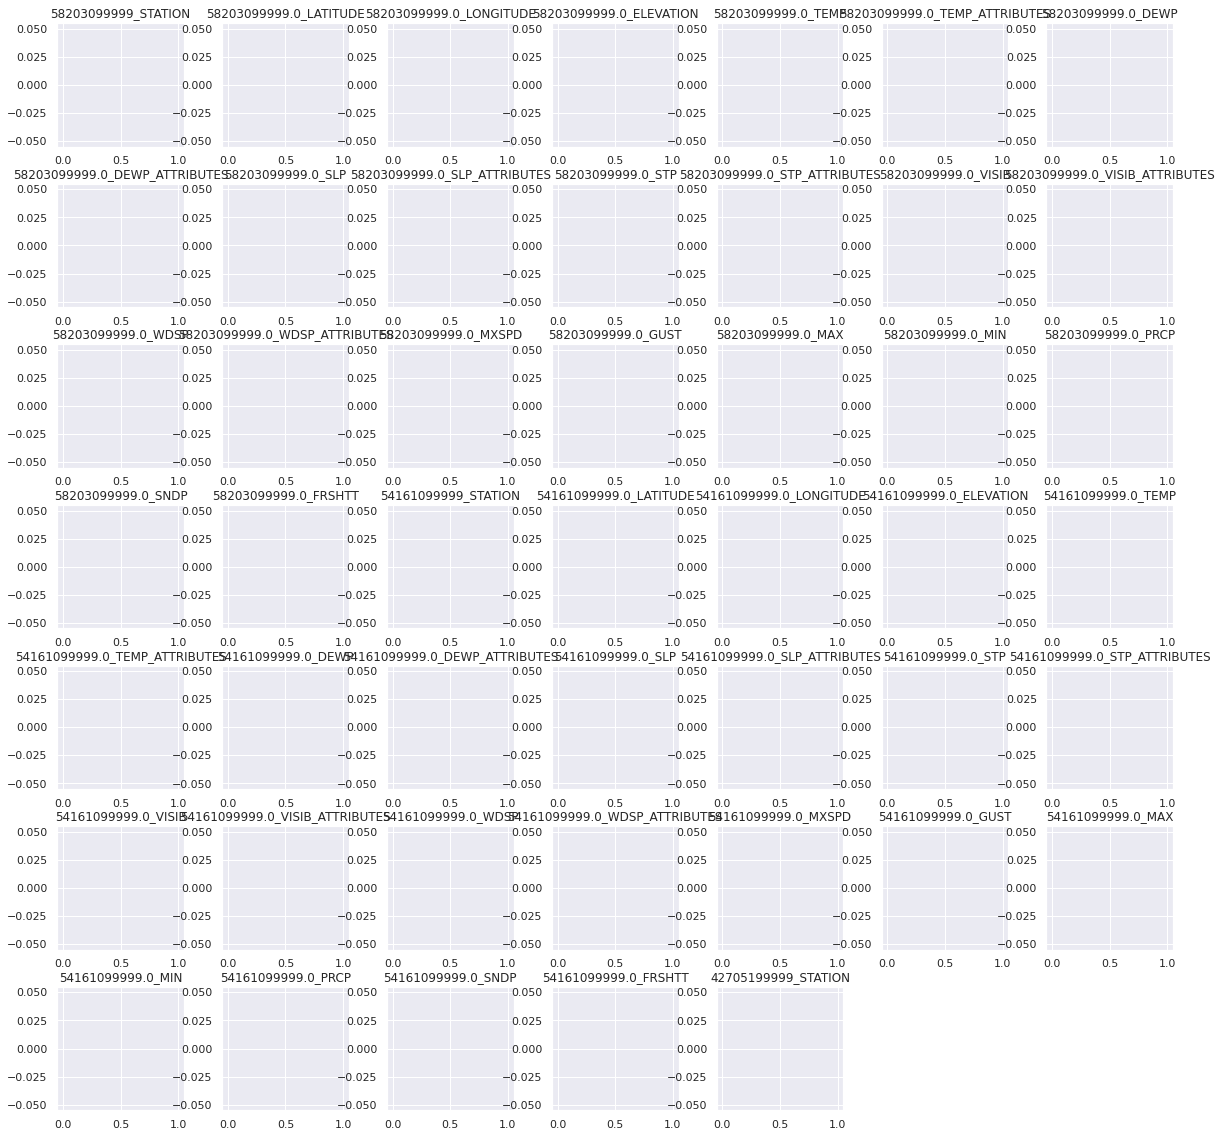

In [ ]:
df_rice.iloc[:,100:155].hist(alpha=0.5,figsize=(20,20))
plt.plot()

### 1.0 Weather Station EDA

EDA is exploratory data analysis  is a step that is used to analyze the data. In this case for the **weather station data**. EDA, we are going to see it next

#### 1.1 Cleaning Dataset

In [ ]:
df_rice

,Unnamed: 0,ZR=F_Open,ZR=F_High,ZR=F_Low,ZR=F_Close,ZR=F_Adj_Close,ZR=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Adj_Close,CL=F_Volume,ZW=F_Open,ZW=F_High,ZW=F_Low,ZW=F_Close,ZW=F_Adj_Close,ZW=F_Volume,59211099999_STATION,59211099999.0_LATITUDE,59211099999.0_LONGITUDE,59211099999.0_ELEVATION,59211099999.0_NAME,59211099999.0_TEMP,59211099999.0_TEMP_ATTRIBUTES,59211099999.0_DEWP,59211099999.0_DEWP_ATTRIBUTES,59211099999.0_SLP,59211099999.0_SLP_ATTRIBUTES,59211099999.0_STP,59211099999.0_STP_ATTRIBUTES,59211099999.0_VISIB,59211099999.0_VISIB_ATTRIBUTES,59211099999.0_WDSP,59211099999.0_WDSP_ATTRIBUTES,59211099999.0_MXSPD,59211099999.0_GUST,59211099999.0_MAX,59211099999.0_MAX_ATTRIBUTES,...,47818099999.0_WDSP.1,47818099999.0_WDSP_ATTRIBUTES.1,47818099999.0_MXSPD.1,47818099999.0_GUST.1,47818099999.0_MAX.1,47818099999.0_MAX_ATTRIBUTES.1,47818099999.0_MIN.1,47818099999.0_MIN_ATTRIBUTES.1,47818099999.0_PRCP.1,47818099999.0_PRCP_ATTRIBUTES.1,47818099999.0_SNDP.1,47818099999.0_FRSHTT.1,47912099999_STATION,47912099999.0_LATITUDE,47912099999.0_LONGITUDE,47912099999.0_ELEVATION,47912099999.0_NAME,47912099999.0_TEMP,47912099999.0_TEMP_ATTRIBUTES,47912099999.0_DEWP,47912099999.0_DEWP_ATTRIBUTES,47912099999.0_SLP,47912099999.0_SLP_ATTRIBUTES,47912099999.0_STP,47912099999.0_STP_ATTRIBUTES,47912099999.0_VISIB,47912099999.0_VISIB_ATTRIBUTES,47912099999.0_WDSP,47912099999.0_WDSP_ATTRIBUTES,47912099999.0_MXSPD,47912099999.0_GUST,47912099999.0_MAX,47912099999.0_MAX_ATTRIBUTES,47912099999.0_MIN,47912099999.0_MIN_ATTRIBUTES,47912099999.0_PRCP,47912099999.0_PRCP_ATTRIBUTES,47912099999.0_SNDP,47912099999.0_FRSHTT,Date
3000,2015-01-23,1116.5,1123.5,1096.0,1101.0,1101.0,459.0,46.63,47.76,45.21,45.59,45.59,374289.0,532.75,536.00,526.25,530.0,530.0,57432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-23
3001,2015-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-24
3002,2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-25
3003,2015-01-26,1099.5,1099.5,1081.0,1088.5,1088.5,388.0,45.20,46.41,44.35,45.15,45.15,310638.0,530.75,534.75,519.25,520.5,520.5,52607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-26
3004,2015-01-27,1089.0,1123.0,1089.0,1097.0,1097.0,396.0,45.13,46.55,44.81,46.23,46.23,313141.0,519.50,524.25,517.50,519.0,519.0,40915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.1,2

In [ ]:
df_rice.columns[:100]

Index(['Unnamed: 0', 'ZR=F_Open', 'ZR=F_High', 'ZR=F_Low', 'ZR=F_Close',
       'ZR=F_Adj_Close', 'ZR=F_Volume', 'CL=F_Open', 'CL=F_High', 'CL=F_Low',
       'CL=F_Close', 'CL=F_Adj_Close', 'CL=F_Volume', 'ZW=F_Open', 'ZW=F_High',
       'ZW=F_Low', 'ZW=F_Close', 'ZW=F_Adj_Close', 'ZW=F_Volume',
       '59211099999_STATION', '59211099999.0_LATITUDE',
       '59211099999.0_LONGITUDE', '59211099999.0_ELEVATION',
       '59211099999.0_NAME', '59211099999.0_TEMP',
       '59211099999.0_TEMP_ATTRIBUTES', '59211099999.0_DEWP',
       '59211099999.0_DEWP_ATTRIBUTES', '59211099999.0_SLP',
       '59211099999.0_SLP_ATTRIBUTES', '59211099999.0_STP',
       '59211099999.0_STP_ATTRIBUTES', '59211099999.0_VISIB',
       '59211099999.0_VISIB_ATTRIBUTES', '59211099999.0_WDSP',
       '59211099999.0_WDSP_ATTRIBUTES', '59211099999.0_MXSPD',
       '59211099999.0_GUST', '59211099999.0_MAX',
       '59211099999.0_MAX_ATTRIBUTES', '59211099999.0_MIN',
       '59211099999.0_MIN_ATTRIBUTES', '59211099999.0_

df_rice_first_station = df_rice[['54753099999_STATION', '54753099999.0_LATITUDE',
       '54753099999.0_LONGITUDE', '54753099999.0_ELEVATION',
       '54753099999.0_NAME', '54753099999.0_TEMP',
       '54753099999.0_TEMP_ATTRIBUTES', '54753099999.0_DEWP',
       '54753099999.0_DEWP_ATTRIBUTES', '54753099999.0_SLP',
       '54753099999.0_SLP_ATTRIBUTES', '54753099999.0_STP',
       '54753099999.0_STP_ATTRIBUTES', '54753099999.0_VISIB',
       '54753099999.0_VISIB_ATTRIBUTES', '54753099999.0_WDSP',
       '54753099999.0_WDSP_ATTRIBUTES', '54753099999.0_MXSPD',
       '54753099999.0_GUST', '54753099999.0_MAX',
       '54753099999.0_MAX_ATTRIBUTES', '54753099999.0_MIN',
       '54753099999.0_MIN_ATTRIBUTES', '54753099999.0_PRCP',
       '54753099999.0_PRCP_ATTRIBUTES', '54753099999.0_SNDP',
       '54753099999.0_FRSHTT']]
       
df_rice.columns[:50]

element_variables = ['58847099999_STATION', '58847099999.0_LATITUDE',
       '58847099999.0_LONGITUDE', '58847099999.0_ELEVATION',
       '58847099999.0_NAME', '58847099999.0_TEMP',
       '58847099999.0_TEMP_ATTRIBUTES', '58847099999.0_DEWP',
       '58847099999.0_DEWP_ATTRIBUTES', '58847099999.0_SLP',
       '58847099999.0_SLP_ATTRIBUTES', '58847099999.0_STP',
       '58847099999.0_STP_ATTRIBUTES', '58847099999.0_VISIB',
       '58847099999.0_VISIB_ATTRIBUTES', '58847099999.0_WDSP',
       '58847099999.0_WDSP_ATTRIBUTES', '58847099999.0_MXSPD',
       '58847099999.0_GUST', '58847099999.0_MAX',
       '58847099999.0_MAX_ATTRIBUTES', '58847099999.0_MIN',
       '58847099999.0_MIN_ATTRIBUTES', '58847099999.0_PRCP',
       '58847099999.0_PRCP_ATTRIBUTES', '58847099999.0_SNDP',
       '58847099999.0_FRSHTT']

       print(len(element_variables))

In [ ]:
df_rice_weather = df_rice.iloc[:,19:]

In [ ]:
df_rice_weather

,59211099999_STATION,59211099999.0_LATITUDE,59211099999.0_LONGITUDE,59211099999.0_ELEVATION,59211099999.0_NAME,59211099999.0_TEMP,59211099999.0_TEMP_ATTRIBUTES,59211099999.0_DEWP,59211099999.0_DEWP_ATTRIBUTES,59211099999.0_SLP,59211099999.0_SLP_ATTRIBUTES,59211099999.0_STP,59211099999.0_STP_ATTRIBUTES,59211099999.0_VISIB,59211099999.0_VISIB_ATTRIBUTES,59211099999.0_WDSP,59211099999.0_WDSP_ATTRIBUTES,59211099999.0_MXSPD,59211099999.0_GUST,59211099999.0_MAX,59211099999.0_MAX_ATTRIBUTES,59211099999.0_MIN,59211099999.0_MIN_ATTRIBUTES,59211099999.0_PRCP,59211099999.0_PRCP_ATTRIBUTES,59211099999.0_SNDP,59211099999.0_FRSHTT,54259099999_STATION,54259099999.0_LATITUDE,54259099999.0_LONGITUDE,54259099999.0_ELEVATION,54259099999.0_NAME,54259099999.0_TEMP,54259099999.0_TEMP_ATTRIBUTES,54259099999.0_DEWP,54259099999.0_DEWP_ATTRIBUTES,54259099999.0_SLP,54259099999.0_SLP_ATTRIBUTES,54259099999.0_STP,54259099999.0_STP_ATTRIBUTES,...,47818099999.0_WDSP.1,47818099999.0_WDSP_ATTRIBUTES.1,47818099999.0_MXSPD.1,47818099999.0_GUST.1,47818099999.0_MAX.1,47818099999.0_MAX_ATTRIBUTES.1,47818099999.0_MIN.1,47818099999.0_MIN_ATTRIBUTES.1,47818099999.0_PRCP.1,47818099999.0_PRCP_ATTRIBUTES.1,47818099999.0_SNDP.1,47818099999.0_FRSHTT.1,47912099999_STATION,47912099999.0_LATITUDE,47912099999.0_LONGITUDE,47912099999.0_ELEVATION,47912099999.0_NAME,47912099999.0_TEMP,47912099999.0_TEMP_ATTRIBUTES,47912099999.0_DEWP,47912099999.0_DEWP_ATTRIBUTES,47912099999.0_SLP,47912099999.0_SLP_ATTRIBUTES,47912099999.0_STP,47912099999.0_STP_ATTRIBUTES,47912099999.0_VISIB,47912099999.0_VISIB_ATTRIBUTES,47912099999.0_WDSP,47912099999.0_WDSP_ATTRIBUTES,47912099999.0_MXSPD,47912099999.0_GUST,47912099999.0_MAX,47912099999.0_MAX_ATTRIBUTES,47912099999.0_MIN,47912099999.0_MIN_ATTRIBUTES,47912099999.0_PRCP,47912099999.0_PRCP_ATTRIBUTES,47912099999.0_SNDP,47912099999.0_FRSHTT,Date
3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-23
3001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-24
3002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-25
3003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-26
3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df_rice_weather.set_index("Date",inplace=True)

In [ ]:
df_rice_weather

,59211099999_STATION,59211099999.0_LATITUDE,59211099999.0_LONGITUDE,59211099999.0_ELEVATION,59211099999.0_NAME,59211099999.0_TEMP,59211099999.0_TEMP_ATTRIBUTES,59211099999.0_DEWP,59211099999.0_DEWP_ATTRIBUTES,59211099999.0_SLP,59211099999.0_SLP_ATTRIBUTES,59211099999.0_STP,59211099999.0_STP_ATTRIBUTES,59211099999.0_VISIB,59211099999.0_VISIB_ATTRIBUTES,59211099999.0_WDSP,59211099999.0_WDSP_ATTRIBUTES,59211099999.0_MXSPD,59211099999.0_GUST,59211099999.0_MAX,59211099999.0_MAX_ATTRIBUTES,59211099999.0_MIN,59211099999.0_MIN_ATTRIBUTES,59211099999.0_PRCP,59211099999.0_PRCP_ATTRIBUTES,59211099999.0_SNDP,59211099999.0_FRSHTT,54259099999_STATION,54259099999.0_LATITUDE,54259099999.0_LONGITUDE,54259099999.0_ELEVATION,54259099999.0_NAME,54259099999.0_TEMP,54259099999.0_TEMP_ATTRIBUTES,54259099999.0_DEWP,54259099999.0_DEWP_ATTRIBUTES,54259099999.0_SLP,54259099999.0_SLP_ATTRIBUTES,54259099999.0_STP,54259099999.0_STP_ATTRIBUTES,...,47818099999.0_VISIB_ATTRIBUTES.1,47818099999.0_WDSP.1,47818099999.0_WDSP_ATTRIBUTES.1,47818099999.0_MXSPD.1,47818099999.0_GUST.1,47818099999.0_MAX.1,47818099999.0_MAX_ATTRIBUTES.1,47818099999.0_MIN.1,47818099999.0_MIN_ATTRIBUTES.1,47818099999.0_PRCP.1,47818099999.0_PRCP_ATTRIBUTES.1,47818099999.0_SNDP.1,47818099999.0_FRSHTT.1,47912099999_STATION,47912099999.0_LATITUDE,47912099999.0_LONGITUDE,47912099999.0_ELEVATION,47912099999.0_NAME,47912099999.0_TEMP,47912099999.0_TEMP_ATTRIBUTES,47912099999.0_DEWP,47912099999.0_DEWP_ATTRIBUTES,47912099999.0_SLP,47912099999.0_SLP_ATTRIBUTES,47912099999.0_STP,47912099999.0_STP_ATTRIBUTES,47912099999.0_VISIB,47912099999.0_VISIB_ATTRIBUTES,47912099999.0_WDSP,47912099999.0_WDSP_ATTRIBUTES,47912099999.0_MXSPD,47912099999.0_GUST,47912099999.0_MAX,47912099999.0_MAX_ATTRIBUTES,47912099999.0_MIN,47912099999.0_MIN_ATTRIBUTES,47912099999.0_PRCP,47912099999.0_PRCP_ATTRIBUTES,47912099999.0_SNDP,47912099999.0_FRSHTT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,NaN,NaN,NaN,NaN,N

#### 1.2 Remove Stations with all empty values

In [ ]:
separated_df = []
for i in range(1,int(len(df_rice_weather.columns)/27)):
  margin_down=27*(i-1)
  margin_up= 27*i
  separated_df.append(df_rice_weather.iloc[:,margin_down:margin_up])

In [ ]:
separated_df[2].isnull().all(axis=0)

57922099999_STATION               True
57922099999.0_LATITUDE            True
57922099999.0_LONGITUDE           True
57922099999.0_ELEVATION           True
57922099999.0_NAME                True
57922099999.0_TEMP                True
57922099999.0_TEMP_ATTRIBUTES     True
57922099999.0_DEWP                True
57922099999.0_DEWP_ATTRIBUTES     True
57922099999.0_SLP                 True
57922099999.0_SLP_ATTRIBUTES      True
57922099999.0_STP                 True
57922099999.0_STP_ATTRIBUTES      True
57922099999.0_VISIB               True
57922099999.0_VISIB_ATTRIBUTES    True
57922099999.0_WDSP                True
57922099999.0_WDSP_ATTRIBUTES     True
57922099999.0_MXSPD               True
57922099999.0_GUST                True
57922099999.0_MAX                 True
57922099999.0_MAX_ATTRIBUTES      True
57922099999.0_MIN                 True
57922099999.0_MIN_ATTRIBUTES      True
57922099999.0_PRCP                True
57922099999.0_PRCP_ATTRIBUTES     True
57922099999.0_SNDP       

In [ ]:
empty_datapoints = []
new_separated_df = []
for x in range(len(separated_df)):
  o = 0
  for i in separated_df[x].isnull().all(axis=0):
    if i == True:
      o = 1
  if o == 1:
    empty_datapoints.append(x)
  else:
    new_separated_df.append(separated_df[x])


In [ ]:
len(separated_df)

674

In [ ]:
new_separated_df[0]

,57993199999_STATION,57993199999.0_LATITUDE,57993199999.0_LONGITUDE,57993199999.0_ELEVATION,57993199999.0_NAME,57993199999.0_TEMP,57993199999.0_TEMP_ATTRIBUTES,57993199999.0_DEWP,57993199999.0_DEWP_ATTRIBUTES,57993199999.0_SLP,57993199999.0_SLP_ATTRIBUTES,57993199999.0_STP,57993199999.0_STP_ATTRIBUTES,57993199999.0_VISIB,57993199999.0_VISIB_ATTRIBUTES,57993199999.0_WDSP,57993199999.0_WDSP_ATTRIBUTES,57993199999.0_MXSPD,57993199999.0_GUST,57993199999.0_MAX,57993199999.0_MAX_ATTRIBUTES,57993199999.0_MIN,57993199999.0_MIN_ATTRIBUTES,57993199999.0_PRCP,57993199999.0_PRCP_ATTRIBUTES,57993199999.0_SNDP,57993199999.0_FRSHTT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.3 Weather Station Analysis



##### 1.31 Missing Values columns

In [ ]:
new_separated_df[1]

,54236099999_STATION,54236099999.0_LATITUDE,54236099999.0_LONGITUDE,54236099999.0_ELEVATION,54236099999.0_NAME,54236099999.0_TEMP,54236099999.0_TEMP_ATTRIBUTES,54236099999.0_DEWP,54236099999.0_DEWP_ATTRIBUTES,54236099999.0_SLP,54236099999.0_SLP_ATTRIBUTES,54236099999.0_STP,54236099999.0_STP_ATTRIBUTES,54236099999.0_VISIB,54236099999.0_VISIB_ATTRIBUTES,54236099999.0_WDSP,54236099999.0_WDSP_ATTRIBUTES,54236099999.0_MXSPD,54236099999.0_GUST,54236099999.0_MAX,54236099999.0_MAX_ATTRIBUTES,54236099999.0_MIN,54236099999.0_MIN_ATTRIBUTES,54236099999.0_PRCP,54236099999.0_PRCP_ATTRIBUTES,54236099999.0_SNDP,54236099999.0_FRSHTT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-23,5.423610e+10,42.416667,122.533333,84.0,"ZHANGWU, CH",21.2,8.0,12.5,8.0,1019.9,8.0,8.7,4.0,5.0,8.0,3.6,8.0,5.8,999.9,32.9,,6.6,,0.00,I,999.9,100000.0
2015-01-24,5.423610e+10,42.416667,122.533333,84.0,"ZHANGWU, CH",19.2,8.0,7.0,8.0,1029.1,8.0,18.8,4.0,2.6,8.0,3.2,8.0,5.8,999.9,26.8,,10.8,,0.00,I,999.9,0.0
2015-01-25,5.423610e+10,42.416667,122.533333,84.0,"ZHANGWU, CH",21.1,8.0,13.8,8.0,1023.9,8.0,13.5,4.0,0.7,7.0,3.9,8.0,5.8,999.9,31.1,,13.8,*,0.00,I,999.9,100000.0
2015-01-26,5.423610e+10,42.416667,122.533333,84.0,"ZHANGWU, CH",13.2,8.0,-2.9,8.0,1032.5,8.0,21.0,4.0,11.9,7.0,8.0,8.0,13.6,999.9,23.4,,1.4,*,0.04,G,999.9,1000.0
2015-01-27,5.423610e+10,42.416667,122.533333,84.0,"ZHANGWU, CH",7.3,8.0,-6.5,8.0,1036.3,8.0,25.2,4.0,6.9,7.0,2.9,8.0,3.9,999.9,20.5,,-1.7,,0.00,I,999.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_separated_df

[            57993199999_STATION  ...  57993199999.0_FRSHTT
 Date                             ...                      
 2015-01-23                  NaN  ...                   NaN
 2015-01-24                  NaN  ...                   NaN
 2015-01-25                  NaN  ...                   NaN
 2015-01-26                  NaN  ...                   NaN
 2015-01-27                  NaN  ...                   NaN
 ...                         ...  ...                   ...
 2021-12-02                  NaN  ...                   NaN
 2021-12-03                  NaN  ...                   NaN
 2021-12-04                  NaN  ...                   NaN
 2021-12-05                  NaN  ...                   NaN
 2021-12-06                  NaN  ...                   NaN
 
 [2559 rows x 27 columns],
             54236099999_STATION  ...  54236099999.0_FRSHTT
 Date                             ...                      
 2015-01-23         5.423610e+10  ...              100000.0
 2015-01-24

[]

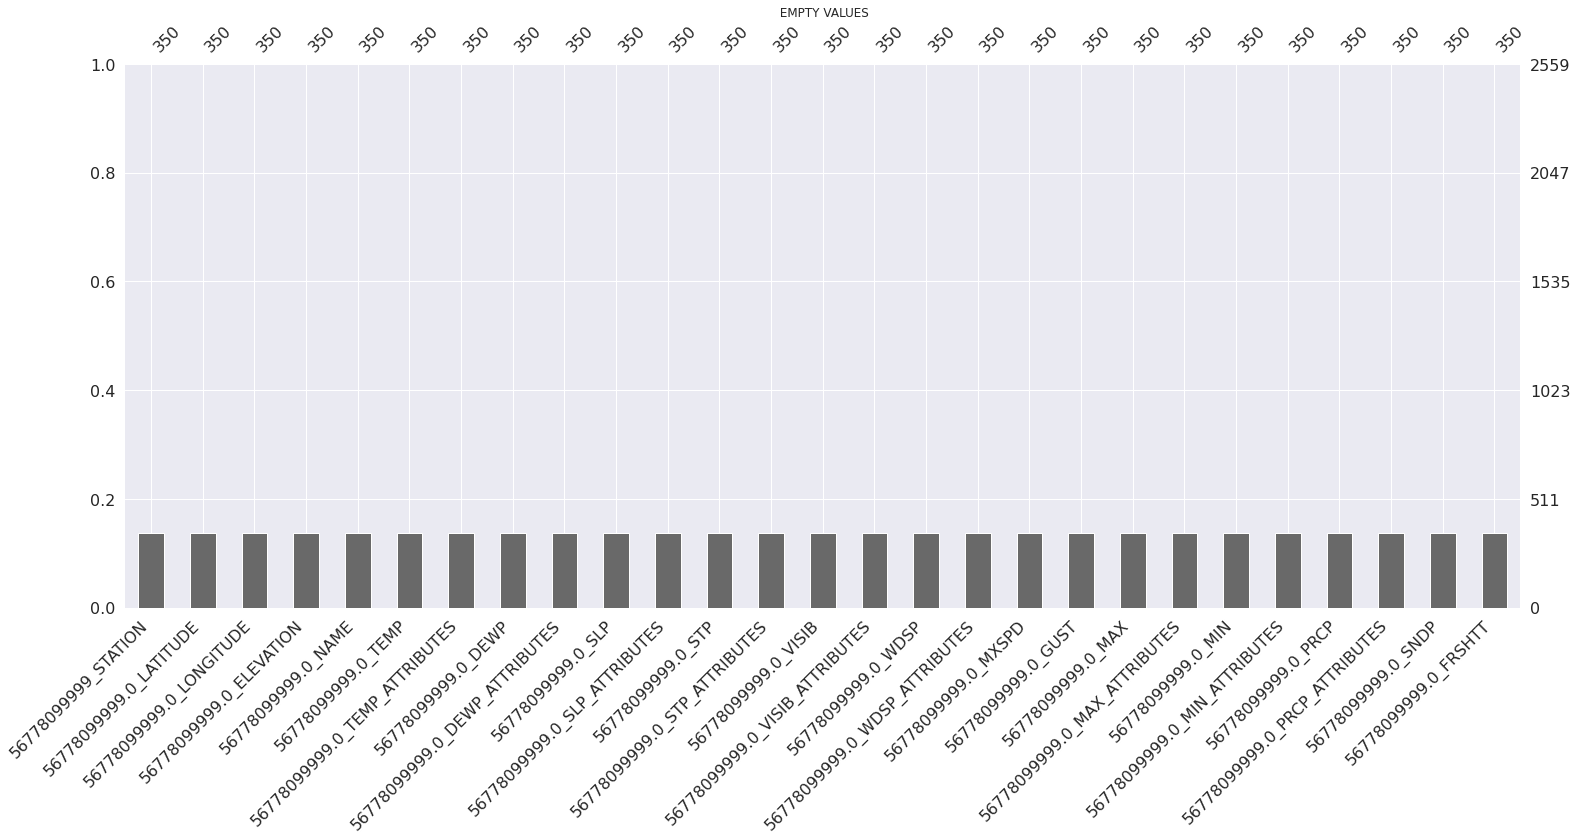

In [ ]:
msno.bar(new_separated_df[2])
plt.title(" EMPTY VALUES")
plt.ylabel("Number of Empty Values")
plt.plot()

Input empty values

In [ ]:
new_separated_df[0]

,57993199999_STATION,57993199999.0_LATITUDE,57993199999.0_LONGITUDE,57993199999.0_ELEVATION,57993199999.0_NAME,57993199999.0_TEMP,57993199999.0_TEMP_ATTRIBUTES,57993199999.0_DEWP,57993199999.0_DEWP_ATTRIBUTES,57993199999.0_SLP,57993199999.0_SLP_ATTRIBUTES,57993199999.0_STP,57993199999.0_STP_ATTRIBUTES,57993199999.0_VISIB,57993199999.0_VISIB_ATTRIBUTES,57993199999.0_WDSP,57993199999.0_WDSP_ATTRIBUTES,57993199999.0_MXSPD,57993199999.0_GUST,57993199999.0_MAX,57993199999.0_MAX_ATTRIBUTES,57993199999.0_MIN,57993199999.0_MIN_ATTRIBUTES,57993199999.0_PRCP,57993199999.0_PRCP_ATTRIBUTES,57993199999.0_SNDP,57993199999.0_FRSHTT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_separated_df[0].isnull().sum()

57993199999_STATION               2558
57993199999.0_LATITUDE            2558
57993199999.0_LONGITUDE           2558
57993199999.0_ELEVATION           2558
57993199999.0_NAME                2558
57993199999.0_TEMP                2558
57993199999.0_TEMP_ATTRIBUTES     2558
57993199999.0_DEWP                2558
57993199999.0_DEWP_ATTRIBUTES     2558
57993199999.0_SLP                 2558
57993199999.0_SLP_ATTRIBUTES      2558
57993199999.0_STP                 2558
57993199999.0_STP_ATTRIBUTES      2558
57993199999.0_VISIB               2558
57993199999.0_VISIB_ATTRIBUTES    2558
57993199999.0_WDSP                2558
57993199999.0_WDSP_ATTRIBUTES     2558
57993199999.0_MXSPD               2558
57993199999.0_GUST                2558
57993199999.0_MAX                 2558
57993199999.0_MAX_ATTRIBUTES      2558
57993199999.0_MIN                 2558
57993199999.0_MIN_ATTRIBUTES      2558
57993199999.0_PRCP                2558
57993199999.0_PRCP_ATTRIBUTES     2558
57993199999.0_SNDP       

  - Fill values with median
  - Remove unnecesary values

In [ ]:
for i in range(len(new_separated_df)):
  new_separated_df[i] = new_separated_df[i].fillna(new_separated_df[i].median())
  for x in new_separated_df[i].columns:
    print(x)
    if "NAME" in x:
      new_separated_df[i].drop(x,axis=1,inplace=True)
    if "MAX_ATTRIBUTES" in x:
      new_separated_df[i].drop(x,axis=1,inplace=True)
    if "MIN_ATTRIBUTES" in x:
      new_separated_df[i].drop(x,axis=1,inplace=True)
    elif "PRCP_ATTRIBUTES" in x:
      new_separated_df[i].drop(x,axis=1,inplace=True)
    else:
      print("H")
     #new_separated_df[i] = new_separated_df[i].drop(x,axis=1)

Streaming output truncated to the last 5000 lines.
82579099999.0_MIN_ATTRIBUTES.1
82579099999.0_PRCP.1
H
82579099999.0_PRCP_ATTRIBUTES.1
82579099999.0_SNDP.1
H
82579099999.0_FRSHTT.1
H
86651099999_STATION
H
86651099999.0_LATITUDE
H
86651099999.0_LONGITUDE
H
86651099999.0_ELEVATION
H
86651099999.0_NAME
H
86651099999.0_TEMP
H
86651099999.0_TEMP_ATTRIBUTES
H
86651099999.0_DEWP
H
86651099999.0_DEWP_ATTRIBUTES
H
86651099999.0_SLP
H
86651099999.0_SLP_ATTRIBUTES
H
86651099999.0_STP
H
86651099999.0_STP_ATTRIBUTES
H
86651099999.0_VISIB
H
86651099999.0_VISIB_ATTRIBUTES
H
86651099999.0_WDSP
H
86651099999.0_WDSP_ATTRIBUTES
H
86651099999.0_MXSPD
H
86651099999.0_GUST
H
86651099999.0_MAX
H
86651099999.0_MAX_ATTRIBUTES
H
86651099999.0_MIN
H
86651099999.0_MIN_ATTRIBUTES
86651099999.0_PRCP
H
86651099999.0_PRCP_ATTRIBUTES
86651099999.0_SNDP
H
86651099999.0_FRSHTT
H
82193099999_STATION.2
H
82193099999.0_LATITUDE.2
H
82193099999.0_LONGITUDE.2
H
82193099999.0_ELEVATION.2
H
82193099999.0_NAME.2
H
82193099999

In [ ]:
new_separated_df[300].isnull().sum()

99999963895_STATION               0
99999963895.0_LATITUDE            0
99999963895.0_LONGITUDE           0
99999963895.0_ELEVATION           0
99999963895.0_TEMP                0
99999963895.0_TEMP_ATTRIBUTES     0
99999963895.0_DEWP                0
99999963895.0_DEWP_ATTRIBUTES     0
99999963895.0_SLP                 0
99999963895.0_SLP_ATTRIBUTES      0
99999963895.0_STP                 0
99999963895.0_STP_ATTRIBUTES      0
99999963895.0_VISIB               0
99999963895.0_VISIB_ATTRIBUTES    0
99999963895.0_WDSP                0
99999963895.0_WDSP_ATTRIBUTES     0
99999963895.0_MXSPD               0
99999963895.0_GUST                0
99999963895.0_MAX                 0
99999963895.0_MIN                 0
99999963895.0_PRCP                0
99999963895.0_SNDP                0
99999963895.0_FRSHTT              0
dtype: int64

##### 1.32 Distributions

In [ ]:
new_separated_df


[            57993199999_STATION  ...  57993199999.0_FRSHTT
 Date                             ...                      
 2015-01-23         5.799320e+10  ...              100000.0
 2015-01-24         5.799320e+10  ...              100000.0
 2015-01-25         5.799320e+10  ...              100000.0
 2015-01-26         5.799320e+10  ...              100000.0
 2015-01-27         5.799320e+10  ...              100000.0
 ...                         ...  ...                   ...
 2021-12-02         5.799320e+10  ...              100000.0
 2021-12-03         5.799320e+10  ...              100000.0
 2021-12-04         5.799320e+10  ...              100000.0
 2021-12-05         5.799320e+10  ...              100000.0
 2021-12-06         5.799320e+10  ...              100000.0
 
 [2559 rows x 23 columns],
             54236099999_STATION  ...  54236099999.0_FRSHTT
 Date                             ...                      
 2015-01-24         5.423610e+10  ...                   0.0
 2015-01-27

[]

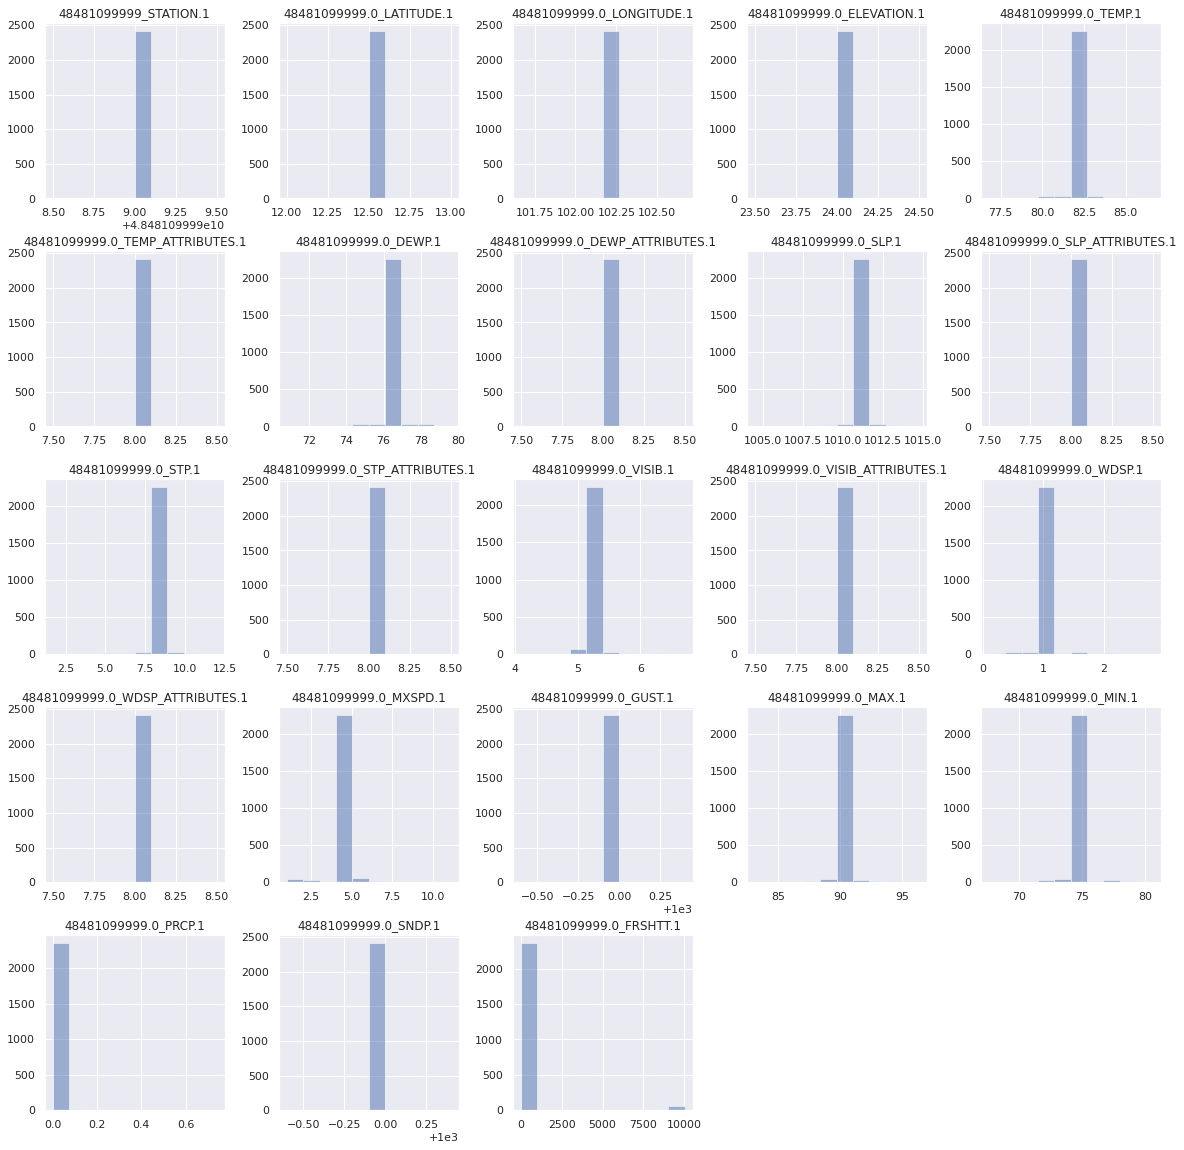

In [ ]:
new_separated_df[20].hist(alpha=0.5,figsize=(20,20))
plt.plot()

MXDP --> Only completely normal distribution

In [ ]:
new_separated_df[0].columns

Index(['57993199999_STATION', '57993199999.0_LATITUDE',
       '57993199999.0_LONGITUDE', '57993199999.0_ELEVATION',
       '57993199999.0_TEMP', '57993199999.0_TEMP_ATTRIBUTES',
       '57993199999.0_DEWP', '57993199999.0_DEWP_ATTRIBUTES',
       '57993199999.0_SLP', '57993199999.0_SLP_ATTRIBUTES',
       '57993199999.0_STP', '57993199999.0_STP_ATTRIBUTES',
       '57993199999.0_VISIB', '57993199999.0_VISIB_ATTRIBUTES',
       '57993199999.0_WDSP', '57993199999.0_WDSP_ATTRIBUTES',
       '57993199999.0_MXSPD', '57993199999.0_GUST', '57993199999.0_MAX',
       '57993199999.0_MIN', '57993199999.0_PRCP', '57993199999.0_SNDP',
       '57993199999.0_FRSHTT'],
      dtype='object')

In [ ]:
#### Remove all nan columns

In [ ]:
from scipy.stats import shapiro

#### 1.34 Outliers

In [ ]:
new_separated_df_outlier = []


out_param = 1.5
for i in range(len(new_separated_df)):
  Q1 = new_separated_df[i].quantile(0.25)
  Q3 = new_separated_df[i].quantile(0.75)
  IQR = Q3-Q1
  outlier = new_separated_df[i][~((new_separated_df[i] < (Q1 - out_param * IQR)) |(new_separated_df[i] > (Q3 + out_param * IQR))).any(axis=1)]
  new_separated_df_outlier.append(outlier)

In [ ]:
new_separated_df_outlier

[            57993199999_STATION  ...  57993199999.0_FRSHTT
 Date                             ...                      
 2015-01-23         5.799320e+10  ...              100000.0
 2015-01-24         5.799320e+10  ...              100000.0
 2015-01-25         5.799320e+10  ...              100000.0
 2015-01-26         5.799320e+10  ...              100000.0
 2015-01-27         5.799320e+10  ...              100000.0
 ...                         ...  ...                   ...
 2021-12-02         5.799320e+10  ...              100000.0
 2021-12-03         5.799320e+10  ...              100000.0
 2021-12-04         5.799320e+10  ...              100000.0
 2021-12-05         5.799320e+10  ...              100000.0
 2021-12-06         5.799320e+10  ...              100000.0
 
 [2559 rows x 23 columns],
             54236099999_STATION  ...  54236099999.0_FRSHTT
 Date                             ...                      
 2016-01-01         5.423610e+10  ...                   0.0
 2016-01-02

In [ ]:
len(new_separated_df_outlier)

310

In [ ]:
for i in range(len(new_separated_df_outlier)):
  print("length of dataframe:",len(new_separated_df_outlier[i]))
  print(new_separated_df_outlier[i].isna().sum())

Streaming output truncated to the last 5000 lines.
length of dataframe: 2187
48405099999_STATION.1               0
48405099999.0_LATITUDE.1            0
48405099999.0_LONGITUDE.1           0
48405099999.0_ELEVATION.1           0
48405099999.0_TEMP.1                0
48405099999.0_TEMP_ATTRIBUTES.1     0
48405099999.0_DEWP.1                0
48405099999.0_DEWP_ATTRIBUTES.1     0
48405099999.0_SLP.1                 0
48405099999.0_SLP_ATTRIBUTES.1      0
48405099999.0_STP.1                 0
48405099999.0_STP_ATTRIBUTES.1      0
48405099999.0_VISIB.1               0
48405099999.0_VISIB_ATTRIBUTES.1    0
48405099999.0_WDSP.1                0
48405099999.0_WDSP_ATTRIBUTES.1     0
48405099999.0_MXSPD.1               0
48405099999.0_GUST.1                0
48405099999.0_MAX.1                 0
48405099999.0_MIN.1                 0
48405099999.0_PRCP.1                0
48405099999.0_SNDP.1                0
48405099999.0_FRSHTT.1              0
dtype: int64
length of dataframe: 2187
4848109999

In [ ]:
new_separated_df = new_separated_df_outlier

#### 1.35 Normalization

In [ ]:
from sklearn import preprocessing 

In [ ]:
#Escalar Datos
new_separated_df_normalized = []
for i in range(len(new_separated_df)):
  scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
  X = scaler.fit_transform(new_separated_df[i])
  new_separated_df_normalized.append(pd.DataFrame(X,columns=new_separated_df[i].columns,index=new_separated_df[i].index))


In [ ]:
new_separated_df_normalized[20]

In [ ]:
new_separated_df[20].hist(alpha=0.5,figsize=(20,20))
plt.plot()

In [ ]:
new_separated_df[1]

In [ ]:
#df =new_separated_df[1]
#for i in range(2,len(new_separated_df)):
 #  new_separated_df[i] = new_separated_df[i].iloc[:4,:]
 #  df = pd.concat([df,new_separated_df[i]],axis=1,join="inner")

In [ ]:
df = pd.concat(new_separated_df,axis=1)

In [ ]:
#df = new_separated_df[0]
#for i in range(1,len(new_separated_df)):
   #df = df.join(new_separated_df[i],how="outer")

In [ ]:
test_df = new_separated_df[0]
for i in np.arange(1,10):
  test_df = test_df.join(new_separated_df[i], how='outer')


In [ ]:
test_df

,57993199999_STATION,57993199999.0_LATITUDE,57993199999.0_LONGITUDE,57993199999.0_ELEVATION,57993199999.0_TEMP,57993199999.0_TEMP_ATTRIBUTES,57993199999.0_DEWP,57993199999.0_DEWP_ATTRIBUTES,57993199999.0_SLP,57993199999.0_SLP_ATTRIBUTES,57993199999.0_STP,57993199999.0_STP_ATTRIBUTES,57993199999.0_VISIB,57993199999.0_VISIB_ATTRIBUTES,57993199999.0_WDSP,57993199999.0_WDSP_ATTRIBUTES,57993199999.0_MXSPD,57993199999.0_GUST,57993199999.0_MAX,57993199999.0_MIN,57993199999.0_PRCP,57993199999.0_SNDP,57993199999.0_FRSHTT,54236099999_STATION,54236099999.0_LATITUDE,54236099999.0_LONGITUDE,54236099999.0_ELEVATION,54236099999.0_TEMP,54236099999.0_TEMP_ATTRIBUTES,54236099999.0_DEWP,54236099999.0_DEWP_ATTRIBUTES,54236099999.0_SLP,54236099999.0_SLP_ATTRIBUTES,54236099999.0_STP,54236099999.0_STP_ATTRIBUTES,54236099999.0_VISIB,54236099999.0_VISIB_ATTRIBUTES,54236099999.0_WDSP,54236099999.0_WDSP_ATTRIBUTES,54236099999.0_MXSPD,54236099999.0_GUST,54236099999.0_MAX,54236099999.0_MIN,54236099999.0_PRCP,54236099999.0_SNDP,54236099999.0_FRSHTT,56778099999_STATION,56778099999.0_LATITUDE,56778099999.0_LONGITUDE,56778099999.0_ELEVATION,56778099999.0_TEMP,56778099999.0_TEMP_ATTRIBUTES,56778099999.0_DEWP,56778099999.0_DEWP_ATTRIBUTES,56778099999.0_SLP,56778099999.0_SLP_ATTRIBUTES,56778099999.0_STP,56778099999.0_STP_ATTRIBUTES,56778099999.0_VISIB,56778099999.0_VISIB_ATTRIBUTES,56778099999.0_WDSP,56778099999.0_WDSP_ATTRIBUTES,56778099999.0_MXSPD,56778099999.0_GUST,56778099999.0_MAX,56778099999.0_MIN,56778099999.0_PRCP,56778099999.0_SNDP,56778099999.0_FRSHTT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-23,5.799320e+10,36.856561,117.215994,23.16,30.5,6.0,29.3,6.0,9999.9,0.0,999.9,0.0,0.4,6.0,3.2,6.0,5.8,999.9,33.8,26.6,0.0,999.9,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-24,5.799320e+10,36.856561,117.215994,23.16,30.5,6.0,29.3,6.0,9999.9,0.0,999.9,0.0,0.4,6.0,3.2,6.0,5.8,999.9,33.8,26.6,0.0,999.9,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,5.799320e+10,36.856561,117.215994,23.16,30.5,6.0,29.3,6.0,9999.9,0.0,999.9,0.0,0.4,6.0,3.2,6.0,5.8,999.9,33.8,26.6,0.0,999.9,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-26,5.799320e+10,36.856561,117.215994,23.16,30.5,6.0,29.3,6.0,9999.9,0.0,999.9,0.0,0.4,6.0,3.2,6.0,5.8,999.9,33.8,26.6,0.0,999.9,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-27,5.799320e+10,36.856561,117.215994,23.16,30.5,6.0,29.3,6.0,9999.9,0.0,999.9,0.0,0.4,6.0,3.2,6.0,5.8,999.9,33.8,26.6,0.0,999.9,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,5.799320e+10,36.856561,117.215994,23.16,30.5,6.0,29.3,6.0,9999.9,0.0,999.9,0.0,0.4,6.0,3.2,6.0,5.8,999.9,33.8,26.6,0.0,999.9,100000.0,5.423610e+10,42.416667,122.533333,84.0,52.55,8.0,33.8,8.0,1015.05,8.0,17.0,8.0,9.95,8.0,5.6,8.0,9.7,999.9,64.6,37.1,0.0,999.9,0.0,5.677810e+10,24.992364,102.743536,1894.94,61.8,24.0,49.0,24.0,9999.9,0.0,810.7,8.0,7.4,21.0,8.0,24.0,15.5,999.9,72.5,51.7,0.0,999.9,0.0
2021-12-03,5.799320e+10,36.856561,117.

In [ ]:
len(new_separated_df)

310

In [ ]:

new_separated_df_export = pd.DataFrame(np.array(A).reshape(-1,len(A)))
new_separated_df.to_csv("drive/MyDrive/COGS_Project/EDA/Data/Multivariate_weather_preprocessed.csv")

### 3.0 Stock Analysis

#### 3.1 Check Empty Values

In [ ]:
df_rice_stock = df_rice.iloc[:,0:19]

In [ ]:
df_rice_stock.set_index("Unnamed: 0",inplace=True)

In [ ]:
df_rice_stock

,ZR=F_Open,ZR=F_High,ZR=F_Low,ZR=F_Close,ZR=F_Adj_Close,ZR=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Adj_Close,CL=F_Volume,ZW=F_Open,ZW=F_High,ZW=F_Low,ZW=F_Close,ZW=F_Adj_Close,ZW=F_Volume
Unnamed: 0,,,,,,,,,,,,,,,,,,
2015-01-23,1116.5,1123.5,1096.0,1101.0,1101.0,459.0,46.63,47.76,45.21,45.59,45.59,374289.0,532.75,536.00,526.25,530.0,530.0,57432.0
2015-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-26,1099.5,1099.5,1081.0,1088.5,1088.5,388.0,45.20,46.41,44.35,45.15,45.15,310638.0,530.75,534.75,519.25,520.5,520.5,52607.0
2015-01-27,1089.0,1123.0,1089.0,1097.0,1097.0,396.0,45.13,46.55,44.81,46.23,46.23,313141.0,519.50,524.25,517.50,519.0,519.0,40915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[]

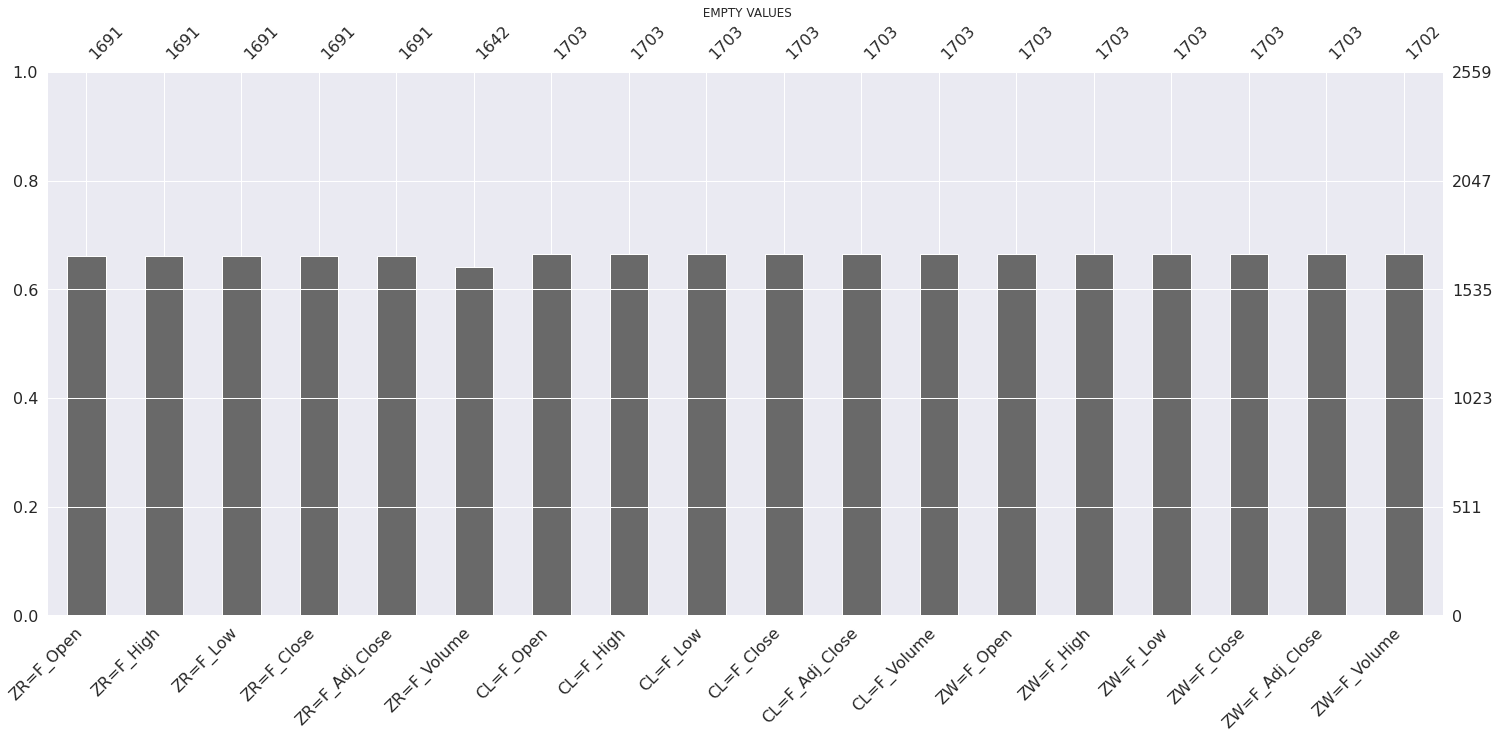

In [ ]:
msno.bar(df_rice_stock)
plt.title(" EMPTY VALUES")
plt.ylabel("Number of Empty Values")
plt.plot()

#### 3.2 Remove Empty Values

In [ ]:
df_rice_stock = df_rice_stock.fillna(df_rice_stock.median())

In [1]:
2559-1703

856

[]

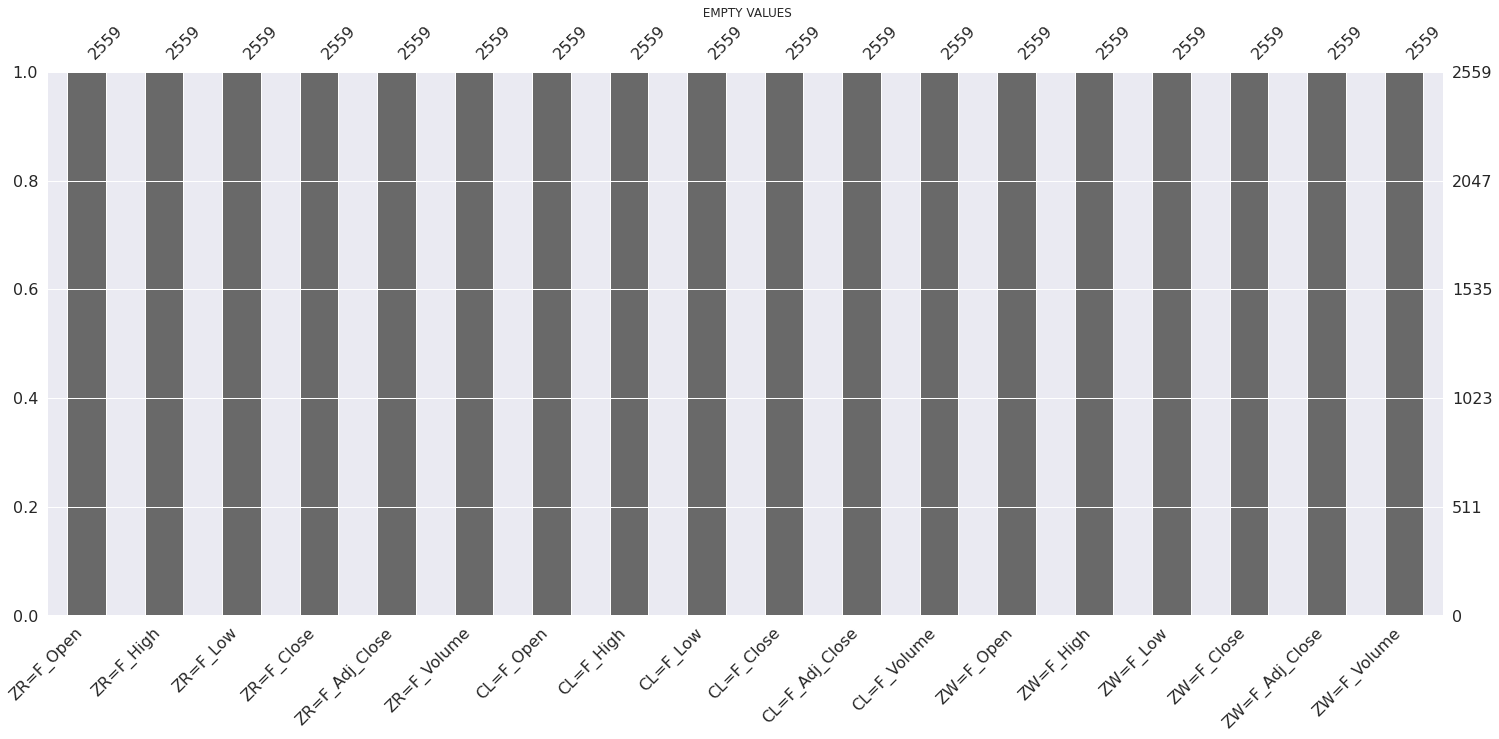

In [ ]:
msno.bar(df_rice_stock)
plt.title(" EMPTY VALUES")
plt.ylabel("Number of Empty Values")
plt.plot()

#### 3.3 Check Distributions

[]

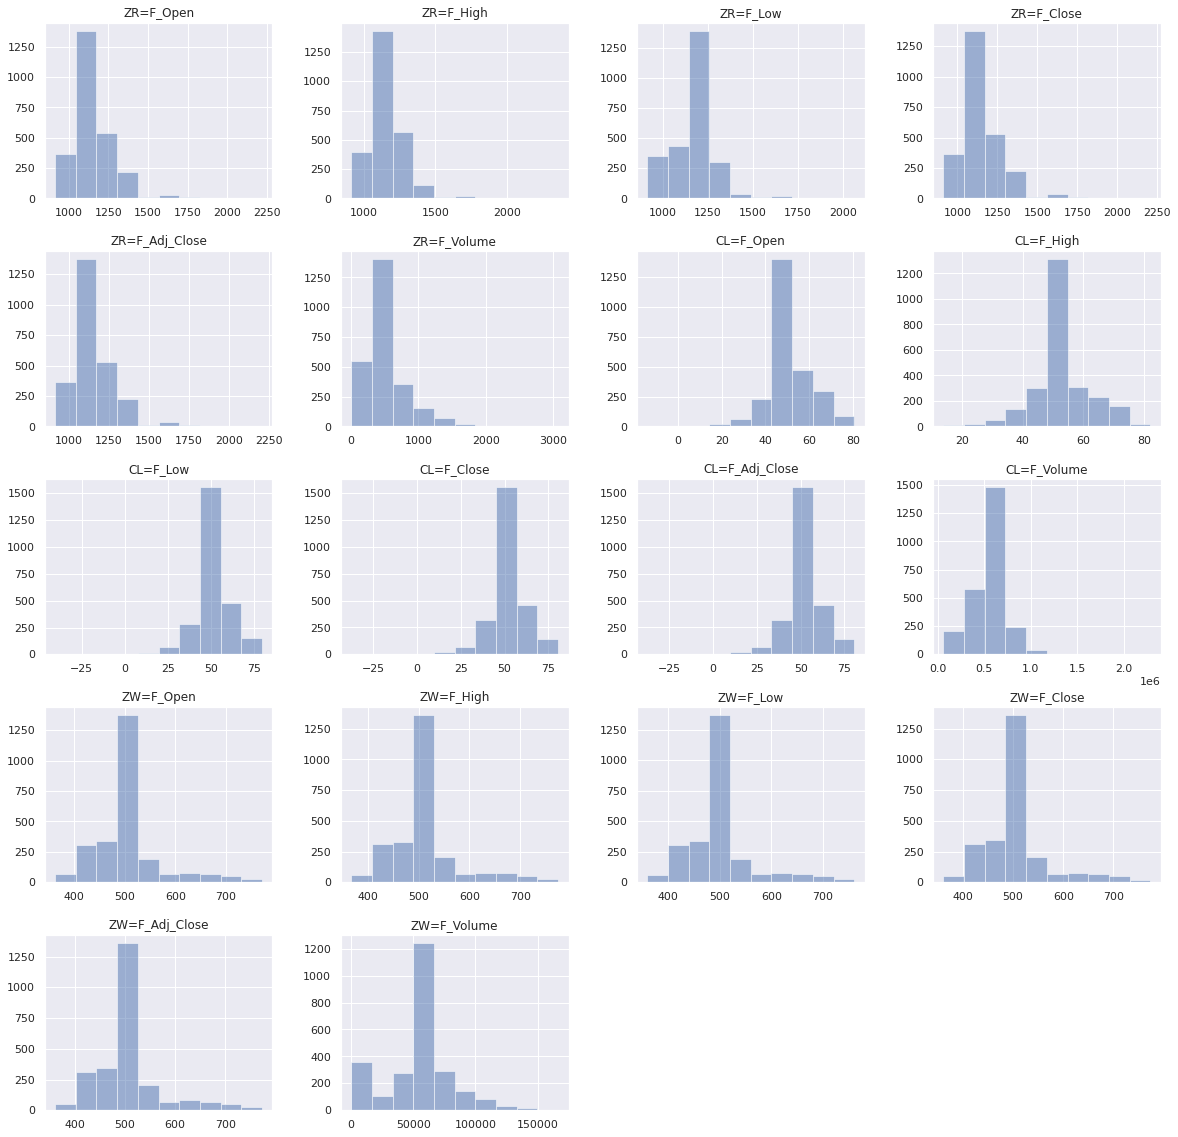

In [ ]:
df_rice_stock.hist(alpha=0.5,figsize=(20,20))
plt.plot()

In [ ]:
from scipy.stats import shapiro

In [ ]:
for i in df_rice_stock.columns:
	stat, p = shapiro(df_rice_stock[i])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics=0.865, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.851, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.886, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.874, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.874, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.876, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.934, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.912, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.919, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.919, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.902, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.840, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.842, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.840, p=0.000
Sample does not look G

#### 3.3 Remove Outliers

In [ ]:
Q1 = df_rice_stock.quantile(0.25)
Q3 = df_rice_stock.quantile(0.75)
IQR = Q3-Q1
out_param = 1.5
df_rice_stock = df_rice_stock[~((df_rice_stock < (Q1 - out_param * IQR)) |(df_rice_stock > (Q3 + out_param * IQR))).any(axis=1)]


In [ ]:
df_rice_stock

,ZR=F_Open,ZR=F_High,ZR=F_Low,ZR=F_Close,ZR=F_Adj_Close,ZR=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Adj_Close,CL=F_Volume,ZW=F_Open,ZW=F_High,ZW=F_Low,ZW=F_Close,ZW=F_Adj_Close,ZW=F_Volume
Unnamed: 0,,,,,,,,,,,,,,,,,,
2015-01-23,1116.5,1123.5,1096.0,1101.0,1101.0,459.0,46.63,47.76,45.21,45.59,45.59,374289.0,532.75,536.00,526.25,530.00,530.00,57432.0
2015-01-24,1166.5,1175.0,1160.0,1167.0,1167.0,483.5,52.18,53.10,51.33,52.25,52.25,527119.0,498.00,504.75,492.00,497.75,497.75,54237.5
2015-01-25,1166.5,1175.0,1160.0,1167.0,1167.0,483.5,52.18,53.10,51.33,52.25,52.25,527119.0,498.00,504.75,492.00,497.75,497.75,54237.5
2015-01-26,1099.5,1099.5,1081.0,1088.5,1088.5,388.0,45.20,46.41,44.35,45.15,45.15,310638.0,530.75,534.75,519.25,520.50,520.50,52607.0
2015-01-27,1089.0,1123.0,1089.0,1097.0,1097.0,396.0,45.13,46.55,44.81,46.23,46.23,313141.0,519.50,524.25,517.50,519.00,519.00,40915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,1166.5,1175.0,1160.0,1167.0,1167.0,483.5,52.18,53.10,51.33,52.25,52.25,527119.0,498.00,504.75,492.00,497.75,497.75,54237.5
2021-12-03,1166.5,1175.0,1160.0,1167.0,1167.0,483.5,52.18,53.10,51.33,52.25,52.25,527119.0,498.00,504.75,492.00,497.75,497.75,54237.5
2021-12-04,1166.5,1175.0,1160.0,1167.0,1167.0,483.5,52.18,53.10,51.33,52.25,52.25,527119.0,498.00,504.75,492.00,497.75,497.75,54237.5


#### 3.4 Normalize

In [ ]:
from sklearn import preprocessing 

In [ ]:
#Escalar Datos
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(df_rice_stock)

df_rice_stock= pd.DataFrame(X,columns=df_rice_stock.columns,index=df_rice_stock.index)


##### 3.5 Check Results

[]

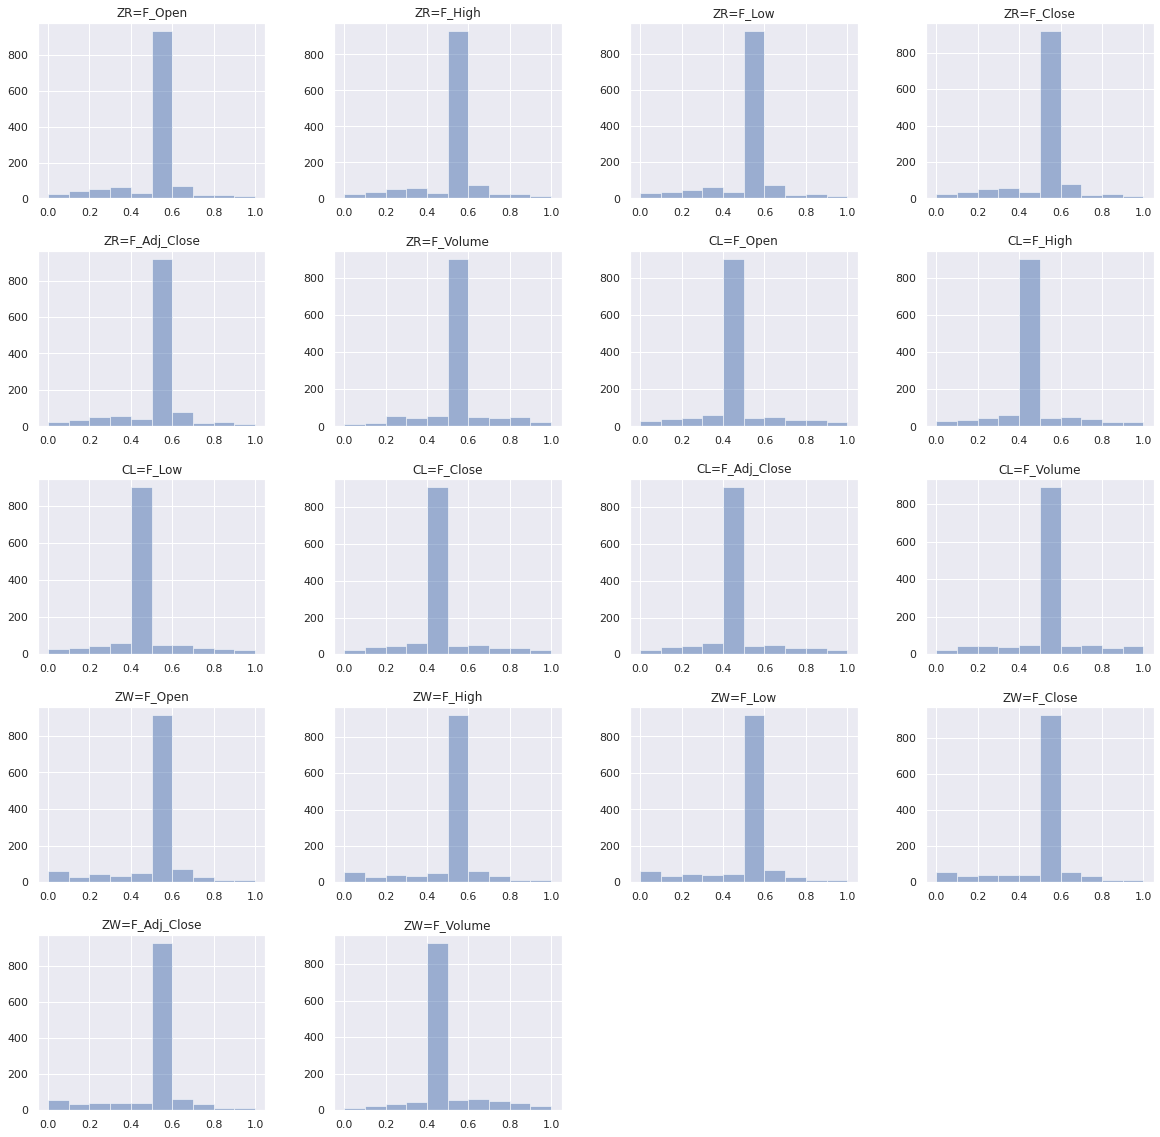

In [ ]:
df_rice_stock.hist(alpha=0.5,figsize=(20,20))
plt.plot()

In [ ]:
for i in df_rice_stock.columns:
	stat, p = shapiro(df_rice_stock[i])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics=0.714, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.715, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.715, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.718, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.718, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.740, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.734, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.736, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.734, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.735, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.735, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.751, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.700, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.692, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.702, p=0.000
Sample does not look G

#### 3.6 Export

In [ ]:
df_rice_stock.to_csv("drive/MyDrive/COGS_Project/EDA/Data/Multivariate_stock_preprocessed.csv")

### 4.0 Combined Analysis

#### 4.1 Combine Datasets